In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Test d'une routine sur la méthode de Galerkine
"""

DataFolder="C:/Users/Julie_000/Desktop/Stage/Stage_l3"
#DataFolder="E:/Clément/Julie/Stage_L3"

# Importations des librairies

In [2]:
import matplotlib.pyplot as plt # pour tracer les figures
import os # pour modifier le dossier de travail
import numpy as np 
from pathlib import Path # Pour rendre les Path compatibles entre Mac et Windows
from matplotlib import rc #Les trois prochaines lignes pour que Ã§a ressemble Ã  latex
rc('font', size=16)
rc('text', usetex=True)
import scipy as sc

from scipy.linalg import pinv as scpinv
from numpy.linalg import pinv as nppinv

# Paramètres

In [3]:
L=1 #taille boîte
a=0.5
b=0.9
k0=np.pi/L
N=5
cp0=0.5#coefficient
cp1=0.1#coefficient

# Création des tableaux

In [4]:
x=np.linspace(a,b,N)#points pris pour l'analyse
y=cp0*np.sin(k0*x)+cp1*np.sin(k0*2*x)+0.01*np.random.randn(np.size(x))

print(np.shape(x),x)
print(np.shape(y),y)

(5,) [0.5 0.6 0.7 0.8 0.9]
(5,) [0.4928088  0.42761518 0.30225423 0.19679271 0.10111533]


# Calcul des matrices
## Calcul de M
M comporte autant de colonnes que de modes et autant de lignes que de mesures.

In [32]:
M0=np.array([np.sin(k0*x),np.sin(2*k0*x)])
print(np.shape(M0),M0)

M=np.transpose(M0)
print(np.shape(M),M)

(2, 5) [[ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
   3.09016994e-01]
 [ 1.22464680e-16 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01
  -5.87785252e-01]]
(5, 2) [[ 1.00000000e+00  1.22464680e-16]
 [ 9.51056516e-01 -5.87785252e-01]
 [ 8.09016994e-01 -9.51056516e-01]
 [ 5.87785252e-01 -9.51056516e-01]
 [ 3.09016994e-01 -5.87785252e-01]]


In [34]:
Modes=2
M1=np.transpose(np.array([np.sin(m*k0*x) for m in range(1,Modes+1)]))
print(np.shape(M1),M1)
print(np.allclose(M,M1))

(5, 2) [[ 1.00000000e+00  1.22464680e-16]
 [ 9.51056516e-01 -5.87785252e-01]
 [ 8.09016994e-01 -9.51056516e-01]
 [ 5.87785252e-01 -9.51056516e-01]
 [ 3.09016994e-01 -5.87785252e-01]]
True


## Calcul du pseudoinverse

In [6]:
pinv1=scpinv(M)
pinv2=nppinv(M)
print("Ces méthodes donnent sensiblement les mêmes matrices : {}".format(np.allclose(pinv1,pinv2)))
print(pinv1)

Ces méthodes donnent sensiblement les mêmes matrices : True
[[ 0.77667141  0.36082923  0.01699993 -0.15482444 -0.1378245 ]
 [ 0.64280137  0.06352124 -0.36635285 -0.50856091 -0.34918265]]


# Calcul des coefficients

In [7]:
cp=np.dot(pinv1,y)
print(np.shape(cp))
y_initial=cp0*np.sin(k0*x)+cp1*np.sin(k0*2*x)
y_Galerkine=cp[0]*np.sin(k0*x)+cp[1]*np.sin(k0*2*x)

(2,)


# Comparaison des tableaux
## Constitution des tableaux

In [40]:
x1=np.linspace(0,1,100)
y_initial=cp0*np.sin(k0*x1)+cp1*np.sin(k0*2*x1)
y_Galerkine=cp[0]*np.sin(k0*x1)+cp[1]*np.sin(k0*2*x1)
y_mesures=cp0*np.sin(k0*x)+cp1*np.sin(k0*2*x)
print(np.shape(y_initial),np.shape(y_Galerkine))

(100,) (100,)


## Tracés

<IPython.core.display.Javascript object>


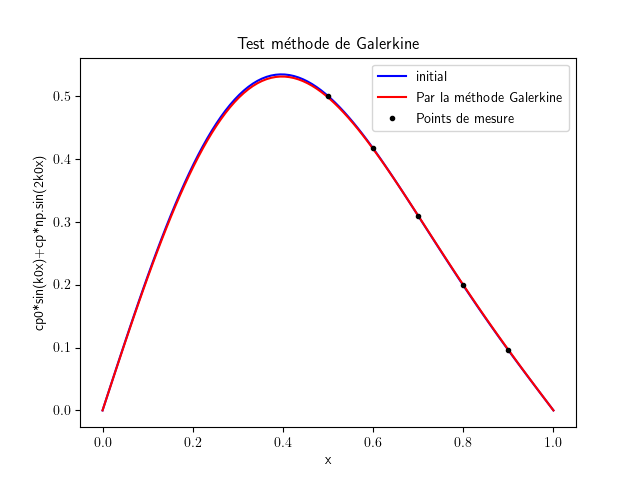

In [41]:
%matplotlib notebook
fig,ax=plt.subplots(num="Par la méthode Galerkine")
ax.plot(x1,y_initial,color='blue',label="initial")
ax.plot(x1,y_Galerkine,color='red',label="Par la méthode Galerkine")
ax.plot(x,y_mesures,color='k',label="Points de mesure",marker=".",linestyle="None")
ax.legend()
plt.title("Test méthode de Galerkine")
plt.xlabel("x")
plt.ylabel("cp0*sin(k0x)+cp*np.sin(2k0x)")
plt.show()

# Test appliqué au problème du nageur
Je teste la méthode sur des données ressemblant à celles obtenues dans l'expérience (qui nécessitent la manipulation de shape faite dans Projet-Galerkine)
## Fonction utilisée

In [35]:
def methode_Galerkine(u,v,x,y,z,P,m,h):
    "Applique la méthode Galerkine"
    #divergence bidimensionelle
    div_2D=np.zeros((P,59,59))
    dx=np.zeros((P,59,59))
    dy=np.zeros((P,59,59))
    for plan in range(P):
        div_2D[plan],dx[plan],dy[plan]=fpd.divergence2D_gauss(u[plan],v[plan],x[plan],y[plan],1)
    #Matrice M
    M=nppinv(np.transpose(np.array([n*np.pi/h*np.cos(n*np.pi/h*z) for n in range(1,m+1)])))
    #Calcul des coefficients
    div_2D=np.reshape(div_2D,(P,59*59))
    a=np.matmul(pinv,div_2D)
    #calcul de vz
    sin=np.transpose(np.array([np.sin(m*np.pi*z/h) for m in range(1,m+1)]))
    vz=np.matmul(sin,a)
    vz=np.reshape(vz,(P,59,59))
    return(vz)